## Aquisição de Dados utilizando o Pandas

É uma boa prática converter atributos object (string) para o tipo category, pois esse tipo lida melhor com atributos que classificam uma entrada de acordo com um conjunto limitado de categorias.

In [ ]:
!pip install --upgrade kagglehub


# Busca e contextualização com um conjunto de dados real

Trata-se de um dataset com amostra de 116 corredores amadores que compartilharam seus dados em acerca de 42.000 corridas . A coleta de dados foi realizada com o Strava (aplicativo de monitoramento de exercícios físicos) em 2019.

In [3]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter


# Baixar o dataset e obter o caminho do arquivo
dataset_path = kagglehub.dataset_download("olegoaer/running-races-strava")

# Encontrar o arquivo CSV dentro do diretório baixado
import os
csv_file = [f for f in os.listdir(dataset_path) if f.endswith(".csv")][0]

# Carregar o CSV diretamente como um DataFrame
df = pd.read_csv(os.path.join(dataset_path, csv_file), sep=";")



Objetendo informações sobre o dataframe e já identificando as possíveis colunas categóricas (object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    41761 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  23732 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


# Fazendo a tradução das colunas

In [5]:
# Dicionário com a tradução das colunas
traducao_colunas = {
    'athlete': 'atleta',
    'gender': 'genero',
    'timestamp': 'data_hora',
    'distance (m)': 'distancia_metros',
    'elapsed time (s)': 'tempo_decorrido_segundos',
    'elevation gain (m)': 'ganho_elevacao_metros',
    'average heart rate (bpm)': 'frequencia_cardiaca_media_bpm'
}

# Aplicar a tradução no dataframe
df.rename(columns=traducao_colunas, inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   atleta                         42116 non-null  int64  
 1   genero                         41761 non-null  object 
 2   data_hora                      42116 non-null  object 
 3   distancia_metros               42116 non-null  float64
 4   tempo_decorrido_segundos       42116 non-null  int64  
 5   ganho_elevacao_metros          42116 non-null  float64
 6   frequencia_cardiaca_media_bpm  23732 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB


In [7]:
df

,atleta,genero,data_hora,distancia_metros,tempo_decorrido_segundos,ganho_elevacao_metros,frequencia_cardiaca_media_bpm
0,18042525,M,15/12/2019 09:08,2965.8,812,17.4,150.3
1,18042525,M,10/12/2019 19:27,10020.8,3290,52.2,160.8
2,18042525,M,03/12/2019 19:46,12132.2,4027,249.0,148.9
3,18042525,M,26/11/2019 19:46,11631.5,4442,194.0,136.2
4,18042525,M,19/11/2019 19:45,11708.1,4022,250.7,146.0
...,...,...,...,...,...,...,...
42111,27950722,F,17/11/2017 17:48,5790.2,2242,19.5,151.0
42112,27950722,F,14/11/2017 18:02,6452.9,2398,19.2,142.0
42113,27950722,F,12/11/2017 09:48,12271.2,5334,203.0,153.5
42114,27950722,F,10/11/2017 18:06,7057.4,2592,25.1,138.8


## Quantidade total de atletas únicos

In [8]:
df['atleta'].nunique()

116

# Distribuição de atletas por gênero

In [9]:
df['genero'].value_counts()
#df['genero'].value_counts(normalize=True)

,count
genero,
M,32289
F,9472


# Análise do conjunto de dados através de ferramentas de visualização

Medindo a correlação entre as variáveis:

*   distancia_metros,
*   tempo_decorrido_segundo
*   ganho_elevacao_metros
*   frequencia_cardiaca_media_bpm



# Qual foi a maior distância percorrida e quem fez

In [10]:
df.loc[df['distancia_metros'] == df['distancia_metros'].max()]


,atleta,genero,data_hora,distancia_metros,tempo_decorrido_segundos,ganho_elevacao_metros,frequencia_cardiaca_media_bpm
16127,17639804,M,18/10/2018 19:59,218950.0,96372,9729.0,134.0


Verificando a correlação entre distância, tempo, ganho e frequência
Próximo de 1 → forte correlação positiva (variáveis aumentam juntas).
Próximo de -1 → forte correlação negativa (uma sobe enquanto a outra desce).
Próximo de 0 → pouca ou nenhuma correlação.

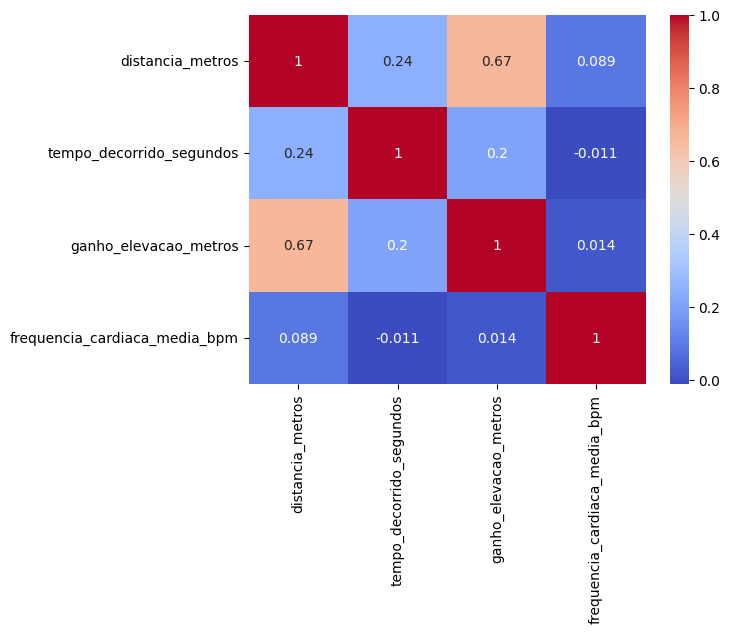

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df_correlacao = df[['distancia_metros', 'tempo_decorrido_segundos', 'ganho_elevacao_metros', 'frequencia_cardiaca_media_bpm']].corr()
#sns.heatmap(df_correlacao.corr(), annot=True, cmap='coolwarm')
sns.heatmap(df_correlacao, annot=True, cmap='coolwarm')

plt.show()
#annot=True vai escrever dentro de cada quadrante o valor da correlação
#cmap=coolwarm detalha a paleta de cores do gráfico:
   # Azul: correlação negativa
   # Vermelho: correlação positiva
   # Branco: correlação neutra

Analisando:
distancia_metros correlacionando com ganho_elevacao_metros = 0.8.
Ou seja, quanto maior a distância, maior a chance de subir mais.
Provavelmente, nas amostras muitas corridas tiveram subida.

Quem correu mais distâncias: homens ou mulheres? Vou utilizar um gráfico boxpot, pois com ele consigo ver as seguinte características:





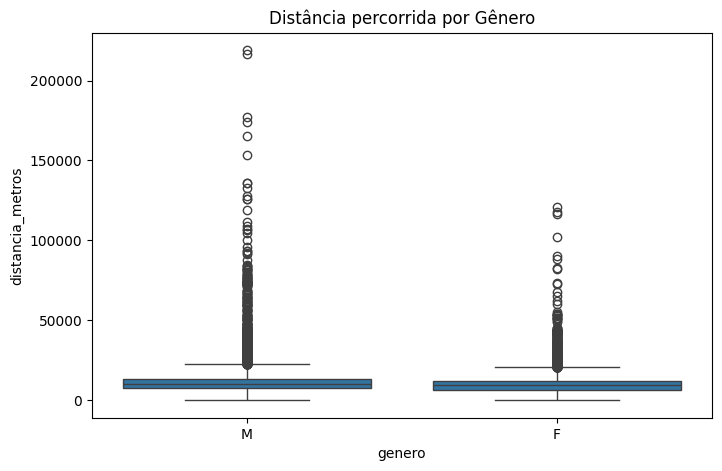

In [12]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='genero', y='distancia_metros', data=df)
plt.title('Distância percorrida por Gênero')
plt.show()


Uma informação importante que o dataset não taz é o pace de cada atleta. O pace é calculado pelo (tempo em minutos) / (distância em km). Ele mede o tempo que um corredor leva para percorrer uma distância, normalmente medida em minutos por quilômetro (min/km). Abaixo, faço a criação dessa coluna no dataframe e o cálculo para todos os registros.

In [13]:
df['pace'] = (df['tempo_decorrido_segundos'] / 60) / (df['distancia_metros'] / 1000)


In [14]:
df

,atleta,genero,data_hora,distancia_metros,tempo_decorrido_segundos,ganho_elevacao_metros,frequencia_cardiaca_media_bpm,pace
0,18042525,M,15/12/2019 09:08,2965.8,812,17.4,150.3,4.563131
1,18042525,M,10/12/2019 19:27,10020.8,3290,52.2,160.8,5.471952
2,18042525,M,03/12/2019 19:46,12132.2,4027,249.0,148.9,5.532110
3,18042525,M,26/11/2019 19:46,11631.5,4442,194.0,136.2,6.364900
4,18042525,M,19/11/2019 19:45,11708.1,4022,250.7,146.0,5.725381
...,...,...,...,...,...,...,...,...
42111,27950722,F,17/11/2017 17:48,5790.2,2242,19.5,151.0,6.453433
42112,27950722,F,14/11/2017 18:02,6452.9,2398,19.2,142.0,6.193598
42113,27950722,F,12/11/2017 09:48,12271.2,5334,203.0,153.5,7.244605
42114,27950722,F,10/11/2017 18:06,7057.4,2592,25.1,138.8,6.121234


Existe correlação entre pace e frequência cardíaca?

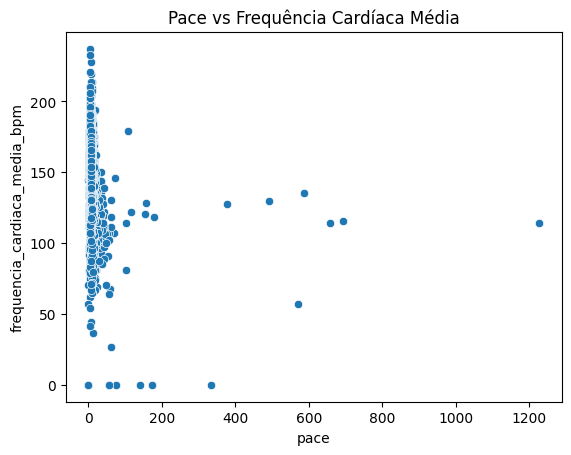

In [15]:
df[['pace', 'frequencia_cardiaca_media_bpm']].corr()
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='pace', y='frequencia_cardiaca_media_bpm', data=df)
plt.title('Pace vs Frequência Cardíaca Média')
plt.show()


Existem muitos outliers com pace muito alto (acima de 200, 600, até 1200), que provavelmente estão distorcendo o gráfico e a análise.

Vamos remover esses outliers e gerar novamente a correlação.

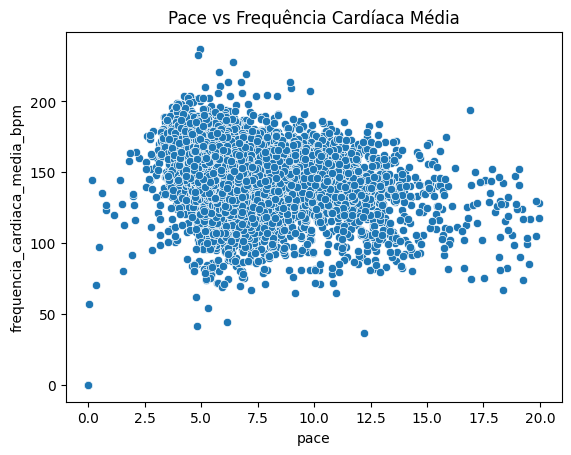

In [16]:
df_sem_outlier = df['pace'] <= 20
df_sem_outlier = df[df_sem_outlier]

sns.scatterplot(x='pace', y='frequencia_cardiaca_media_bpm', data=df_sem_outlier)
plt.title('Pace vs Frequência Cardíaca Média')
plt.show()

VERIFICAR OUTLIERS, VERIFICAR ATRIBUTOS FALTANTES, COMO TRATAR E ETC.




# Verificando o percentual de dados faltantes

In [17]:
# Percentual de dados faltantes
percent_missing = df.isnull().mean() * 100

# Mostrar colunas com mais de 10% de dados ausentes
print(percent_missing[percent_missing > 10].sort_values(ascending=False))

frequencia_cardiaca_media_bpm    43.650869
dtype: float64


# Verificando graficamente o percentual de dados faltantes

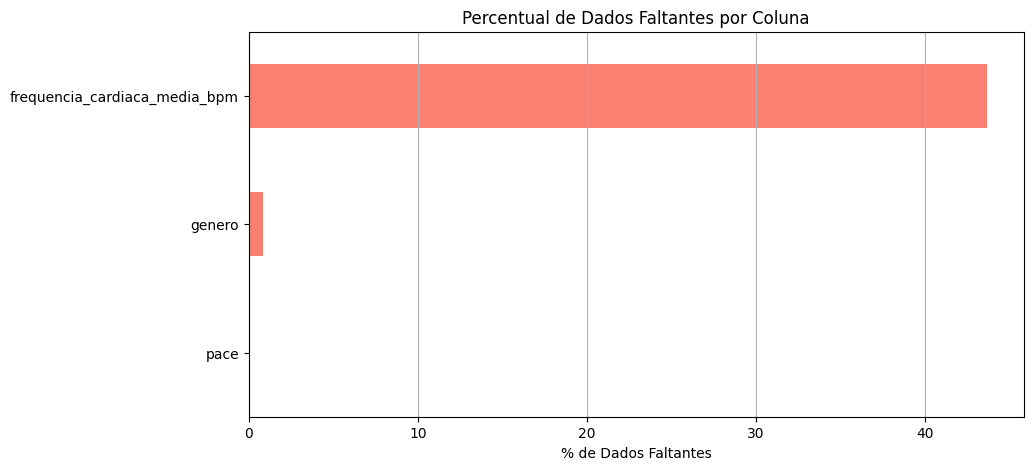

In [18]:
import matplotlib.pyplot as plt

# Gráfico de barras dos dados faltantes
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values()

plt.figure(figsize=(10, 5))
missing.plot(kind='barh', color='salmon')
plt.xlabel('% de Dados Faltantes')
plt.title('Percentual de Dados Faltantes por Coluna')
plt.grid(axis='x')
plt.show()


Tratando os dados ausentes na coluna de frequência cardíaca média com a mediana dos valores presentes

In [19]:
mediana_frequencia_cardiaca= df["frequencia_cardiaca_media_bpm"].median()
df["frequencia_cardiaca_media_bpm"] = df["frequencia_cardiaca_media_bpm"].fillna(mediana_frequencia_cardiaca).astype(float)

Convertendo o atributo gênero (que originalmente é object) para um dado categórico

In [20]:
#genero
df['genero'] = df['genero'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   atleta                         42116 non-null  int64   
 1   genero                         41761 non-null  category
 2   data_hora                      42116 non-null  object  
 3   distancia_metros               42116 non-null  float64 
 4   tempo_decorrido_segundos       42116 non-null  int64   
 5   ganho_elevacao_metros          42116 non-null  float64 
 6   frequencia_cardiaca_media_bpm  42116 non-null  float64 
 7   pace                           42087 non-null  float64 
dtypes: category(1), float64(4), int64(2), object(1)
memory usage: 2.3+ MB


# Média de distância percorrida por gênero

In [21]:
df.groupby('genero')['distancia_metros'].mean()

<ipython-input-21-d13f5201e073>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('genero')['distancia_metros'].mean()


,distancia_metros
genero,
F,10198.566068
M,11283.122556


# Verficando o tempo médio de prova por gênero

In [22]:
df.groupby('genero')['tempo_decorrido_segundos'].mean()


<ipython-input-22-ece205c2b326>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('genero')['tempo_decorrido_segundos'].mean()


,tempo_decorrido_segundos
genero,
F,4150.316512
M,4278.657345


# Corrigindo a coluna de data

In [23]:
df['data_hora'] = pd.to_datetime(df['data_hora'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   atleta                         42116 non-null  int64         
 1   genero                         41761 non-null  category      
 2   data_hora                      42116 non-null  datetime64[ns]
 3   distancia_metros               42116 non-null  float64       
 4   tempo_decorrido_segundos       42116 non-null  int64         
 5   ganho_elevacao_metros          42116 non-null  float64       
 6   frequencia_cardiaca_media_bpm  42116 non-null  float64       
 7   pace                           42087 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 2.3 MB


<ipython-input-23-b42586ebaa7c>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_hora'] = pd.to_datetime(df['data_hora'])


# Criando colunas derivadas a partir de dadas

In [24]:
df['ano_corrida'] = pd.to_datetime(df['data_hora']).dt.year
df['mes_corrida'] = pd.to_datetime(df['data_hora']).dt.month
df['hora_corrida'] = pd.to_datetime(df['data_hora']).dt.hour


# Verificando quantas corridas aconteceram no período da manhã

In [25]:
corridas_manha = (df['hora_corrida'] <= 12)
df_manha = df[corridas_manha]
df_manha

,atleta,genero,data_hora,distancia_metros,tempo_decorrido_segundos,ganho_elevacao_metros,frequencia_cardiaca_media_bpm,pace,ano_corrida,mes_corrida,hora_corrida
0,18042525,M,2019-12-15 09:08:00,2965.8,812,17.4,150.3,4.563131,2019,12,9
9,18042525,M,2019-10-27 11:28:00,14672.7,5218,191.4,126.8,5.927107,2019,10,11
16,18042525,M,2019-07-31 08:33:00,12849.4,5045,420.0,151.3,6.543756,2019,7,8
18,18042525,M,2019-07-23 07:48:00,4346.6,2232,114.1,113.1,8.558413,2019,7,7
19,18042525,M,2019-07-20 07:59:00,10056.6,3745,198.0,131.5,6.206538,2019,7,7
...,...,...,...,...,...,...,...,...,...,...,...
42081,27950722,F,2018-02-18 09:00:00,9544.3,4266,286.3,172.4,7.449472,2018,2,9
42086,27950722,F,2018-02-04 09:23:00,10014.9,4998,354.7,145.8,8.317607,2018,2,9
42092,27950722,F,2018-01-13 09:03:00,9813.5,5072,427.7,124.6,8.613984,2018,1,9
42097,27950722,F,2017-12-31 09:48:00,9620.8,4020,133.6,143.7,6.964078,2017,12,9


# Verificando a velocidade média por gênero

<ipython-input-26-e3356235cda5>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


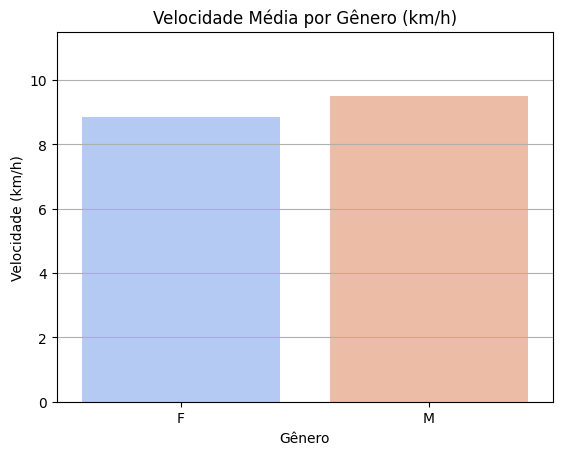

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por gênero e calcular a média de distância e tempo
dados = df.groupby('genero', observed=True).agg({
    'distancia_metros': 'mean',
    'tempo_decorrido_segundos': 'mean'
})

# Calcular velocidade média (em metros por segundo)
dados['velocidade_metros_por_segundo'] = dados['distancia_metros'] / dados['tempo_decorrido_segundos']

# Calcular velocidade média (em km/h)
dados['velocidade_km_por_hora'] = dados['velocidade_metros_por_segundo'] * 3.6

# Resetar o índice para facilitar o plot
dados_reset = dados.reset_index()

# Criar gráfico de barras
sns.barplot(
    data=dados_reset,
    x='genero',
    y='velocidade_km_por_hora',
    palette='coolwarm'
)

# Melhorar o gráfico
plt.title('Velocidade Média por Gênero (km/h)')
plt.xlabel('Gênero')
plt.ylabel('Velocidade (km/h)')
plt.ylim(0, dados['velocidade_km_por_hora'].max() + 2)  # Deixar espaço no topo
plt.grid(axis='y')

plt.show()
